# Code for generating Fig. 6

## Imports

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

#Getting the full manifold data
df = pd.read_csv('no_avg_dataset.csv')

# Importing simulation data with sequence
nia_with_seq_df = pd.read_csv('nn_inputs_with_seq.csv', dtype ={0: float, 1: float, 2: float, 3: str}, delim_whitespace= True, header = None )
nia_with_seq = nia_with_seq_df.to_numpy()

# Importing plain simulation data
nia = np.load("nn_input.npy") # neural net input array
noa = np.load("nn_output.npy") # neural net output array

## Getting distance from p=0

In [4]:
# Defining function to get euclidian distance between two points

def euclid_dist(x1, y1, x2, y2, seq):
    xs = (x2- x1) **2
    ys = (y2-y1) **2
    return np.sqrt(xs + ys), seq

In [5]:
# Getting the euclidian distances for simulation data
sim_dist, euclid_seqs= euclid_dist(nia[:,0], nia[:,1], noa[:,0],noa[:,1], nia_with_seq[:,3])
sim_dist_with_p = np.concatenate((sim_dist.reshape(-1,1), nia[:,2].reshape(-1,1), noa, nia[:,0].reshape(-1,1), nia[:,1].reshape(-1,1)), axis = 1)
seqs = nia_with_seq[:,3]

# Sort the euclidian distances based on p
sorted_indices = np.argsort(sim_dist_with_p[:, 1])
unique_values = np.unique(sim_dist_with_p[:, 1])

# Create new arrays sorted by p for boxplot
new_arrays_sim = []
new_seq_sim = []
prev_index = 0
for value in unique_values:
    indices = sorted_indices[sim_dist_with_p[sorted_indices, 1] == value]
    new_arrays_sim.append(sim_dist_with_p[indices])
    new_seq_sim.append(euclid_seqs[indices])
    prev_index = len(indices)

## Plotting

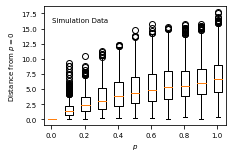

In [14]:
# Figure specs
fig_width_in = 8.3 / 2.54  
aspect_ratio = 1.5
fig_height_in = fig_width_in / aspect_ratio
fontsize = 7

# Creating figure
fig, ax = plt.subplots(figsize=(fig_width_in, fig_height_in))

# Creating the boxplot using the simulation distances
boxplot = ax.boxplot([arr[:, 0] for arr in new_arrays_sim], labels=[f'{value:.1f}' for value in unique_values])

# Getting boxplot positions
box_positions = [box.get_xdata().mean() for box in boxplot['boxes']]

# Defining x tick values
even_values = [0, 0.2, 0.4, 0.6, 0.8, 1]   

# Setting new x tick values
even_x_ticks = [box_positions[i] for i, value in enumerate(unique_values) if value in even_values]
ax.set_xticks(even_x_ticks)
ax.set_xticklabels([f'{value:.1f}' for value in even_values])

# Set the labels and title
ax.set_xlabel(r'$p$', fontsize = fontsize )
ax.set_ylabel("Distance from " +'$p=0$', fontsize = fontsize)
ax.text(1, 16, 'Simulation Data', fontsize = fontsize)
ax.tick_params(axis = 'x', labelsize = fontsize)
ax.tick_params(axis = 'y', labelsize = fontsize)

# Show plot
plt.show()


### Save figure

In [ ]:
fig.savefig('dist_from_p0_boxplot_fig_6.pdf', dpi = 600, bbox_inches = 'tight')